# First Data Science Project
## Melbourne Housing Prices Prediction
Here, we will go through a data challenge using data predicting housing prices in Melbourne, Australia. 

The data is from Kaggle and can be found [here](https://www.kaggle.com/anthonypino/melbourne-housing-market)

In [8]:
import numpy as np
import pandas as pd
from pprint import pprint

## 1. Collection

In [4]:
full_data = pd.read_csv("./data/Melbourne_housing_FULL.csv")

full_data.head()
# train, test: 80/20

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [17]:
full_data
full_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Total count: 34857

In [29]:
print(full_data.columns)
print(len(full_data.columns))
print(full_data.describe())

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
21
              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.

Wir halten fest: 
1. 21 Columns
2. Aber nur 13 mit numerischen Daten

In [45]:
print(full_data.dtypes)


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object


In [48]:
# print(full_data.dtypes  full_data.dtypes==object)


## 2. Cleaning

In [31]:
#print(full_data.dropna(axis=0).describe())
full_data.dropna(axis=0).describe()
#print(len(full_data.dropna(axis=0).describe()))

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


Dropping NA rows results in only 8887 entries left. That's too few.

In [32]:
full_data.dropna(axis=1).describe()


,Rooms
count,34857.000000
mean,3.031012
std,0.969933
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,16.000000


Dropping NA columns results in only the Rooms column left, that is again too few. 

In [36]:
#full_data[~full_data.duplicated()]
sum(full_data.duplicated())

1

There is one duplicate entry. How to get rid of it? 

In [50]:
sing_data = full_data[~full_data.duplicated()]

In [51]:
sing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34856.000000,2.724700e+04,34855.000000,34855.000000,26639.000000,26630.000000,26128.000000,23046.000000,13741.000000,15550.000000,26880.000000,26880.000000,34853.000000
mean,3.031013,1.050173e+06,11.184808,3116.062430,3.084650,1.624747,1.728835,593.607177,160.251616,1965.287653,-37.810634,145.001845,7572.962901
std,0.969947,6.414671e+05,6.788952,109.025437,0.980708,0.724177,1.010789,3398.915462,401.281270,37.328340,0.090281,0.120167,4428.131940
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754092,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


Let's go back to those missing values: 

In [41]:
for col in sing_data.columns:
    print(col, sum(sing_data.loc[:, col].isnull()))

Suburb 0
Address 0
Rooms 0
Type 0
Price 7609
Method 0
SellerG 0
Date 0
Distance 1
Postcode 1
Bedroom2 8217
Bathroom 8226
Car 8728
Landsize 11810
BuildingArea 21115
YearBuilt 19306
CouncilArea 3
Lattitude 7976
Longtitude 7976
Regionname 3
Propertycount 3


OK, that's interesting ...

1. 7609 houses without a price
    - What does this mean - should we exclude them from the model building..? 
2. 21115 houses without a BuildingArea
    - but that must be important? What to do..? 

In [54]:
withprice = sing_data[sing_data['Price'].notna()]

noprice = sing_data[sing_data['Price'].isna()]
withprice.describe()


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,27247.000000,2.724700e+04,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,20993.000000,20993.000000,27244.000000
mean,2.992293,1.050173e+06,11.280276,3113.796080,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,-37.806963,144.996711,7566.781089
std,0.954795,6.414671e+05,6.787469,111.139676,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,0.091619,0.120680,4492.382418
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,-37.860900,144.925300,4294.000000
50%,3.000000,8.700000e+05,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,-37.800460,145.003200,6567.000000
75%,4.000000,1.295000e+06,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,-37.748970,145.068770,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526350,21650.000000


Hmm, I sense a problem: Probably the two dataframes with and without price have different NaN properties - that might make forecasting difficult ... TODO later. 

Anyway, I kinda gotta continue, so: let's drop the NaN rows and see what happens

In [71]:
nonansprice = withprice.dropna()
nonansprice.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8887.000000,8.887000e+03,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000
mean,3.098909,1.092902e+06,11.199887,3111.662653,3.078204,1.646450,1.692247,523.480365,149.309477,1965.753348,-37.804501,144.991393,7475.940137
std,0.963786,6.793819e+05,6.813402,112.614268,0.966269,0.721611,0.975464,1061.324228,87.925580,37.040876,0.090549,0.118919,4375.024364
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,2.000000,6.410000e+05,6.400000,3044.000000,2.000000,1.000000,1.000000,212.000000,100.000000,1945.000000,-37.858560,144.920000,4382.500000
50%,3.000000,9.000000e+05,10.200000,3084.000000,3.000000,2.000000,2.000000,478.000000,132.000000,1970.000000,-37.798700,144.998500,6567.000000
75%,4.000000,1.345000e+06,13.900000,3150.000000,4.000000,2.000000,2.000000,652.000000,180.000000,2000.000000,-37.748945,145.064560,10331.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


OK, I see: there's still entries where Landsize and BuildingArea are not NaNs, but zero. How to drop those? loc?

In [77]:
landnotzero = nonansprice[nonansprice['Landsize'] > 0]
landnotzero.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,7872.000000,7.872000e+03,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000,7872.000000
mean,3.243775,1.153402e+06,11.814075,3112.459858,3.221418,1.697917,1.763592,590.976880,157.887362,1964.159426,-37.802093,144.992415,7361.768166
std,0.895165,6.896584e+05,6.892447,117.328693,0.900110,0.732536,0.998223,1109.851597,87.103857,37.681955,0.094139,0.124767,4384.819945
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1196.000000,-38.174360,144.423790,249.000000
25%,3.000000,6.950000e+05,7.000000,3044.000000,3.000000,1.000000,1.000000,295.000000,108.000000,1940.000000,-37.859085,144.913222,4217.000000
50%,3.000000,9.550000e+05,10.800000,3082.000000,3.000000,2.000000,2.000000,538.000000,139.000000,1970.000000,-37.794865,145.001400,6482.000000
75%,4.000000,1.402000e+06,14.500000,3149.000000,4.000000,2.000000,2.000000,669.000000,187.000000,1998.000000,-37.742500,145.071570,10175.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


In [78]:
buildingnotzero = landnotzero[landnotzero['BuildingArea'] > 0]
buildingnotzero.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,7827.000000,7.827000e+03,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000,7827.000000
mean,3.242238,1.153357e+06,11.803513,3112.349687,3.219752,1.697458,1.763511,590.794557,158.795108,1964.080874,-37.802280,144.992305,7356.187811
std,0.895421,6.894343e+05,6.891310,117.155917,0.900352,0.733414,0.999697,1111.523157,86.524818,37.700678,0.093967,0.124850,4384.152246
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1196.000000,-38.174360,144.423790,249.000000
25%,3.000000,6.950000e+05,7.000000,3044.000000,3.000000,1.000000,1.000000,294.500000,109.000000,1940.000000,-37.859155,144.913000,4217.000000
50%,3.000000,9.550000e+05,10.800000,3082.000000,3.000000,2.000000,2.000000,538.000000,140.000000,1970.000000,-37.794870,145.001200,6482.000000
75%,4.000000,1.402000e+06,14.500000,3149.000000,4.000000,2.000000,2.000000,669.500000,188.000000,1998.000000,-37.742700,145.071530,10175.000000
max,12.000000,9.000000e+06,47.400000,3977.000000,12.000000,9.000000,10.000000,42800.000000,3112.000000,2019.000000,-37.407200,145.526350,21650.000000


OK, they seem equal. (..?)

Anyway, is there a way to diff two dfs? 

Whatever, continue.

## 3. Exploratory Analysis

(array([4.0000e+00, 2.4000e+01, 7.0400e+02, 4.8060e+03, 1.0434e+04,
        7.2650e+03, 3.1760e+03, 7.1700e+02, 1.1200e+02, 5.0000e+00]),
 array([4.92941893, 5.14139884, 5.35337875, 5.56535865, 5.77733856,
        5.98931847, 6.20129838, 6.41327829, 6.6252582 , 6.83723811,
        7.04921802]),
 <BarContainer object of 10 artists>)

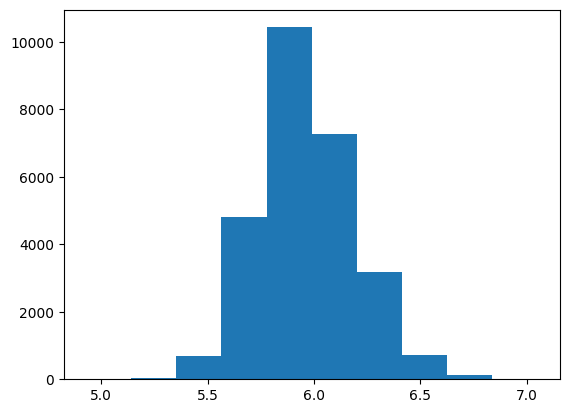

In [66]:
import matplotlib.pyplot as plt
plt.hist(np.log10(withprice['Price']))

(array([   4.,   84.,  638., 2163., 2627., 2027.,  983.,  304.,   48.,
           9.]),
 array([5.1172713 , 5.30096842, 5.48466554, 5.66836266, 5.85205978,
        6.0357569 , 6.21945402, 6.40315115, 6.58684827, 6.77054539,
        6.95424251]),
 <BarContainer object of 10 artists>)

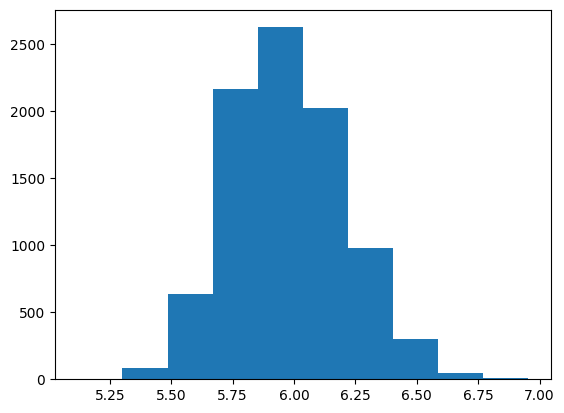

In [72]:
plt.hist(np.log10(nonansprice['Price']))

Continuing with '''nonansprice''' now: 

Text(0, 0.5, 'log10(Price)')

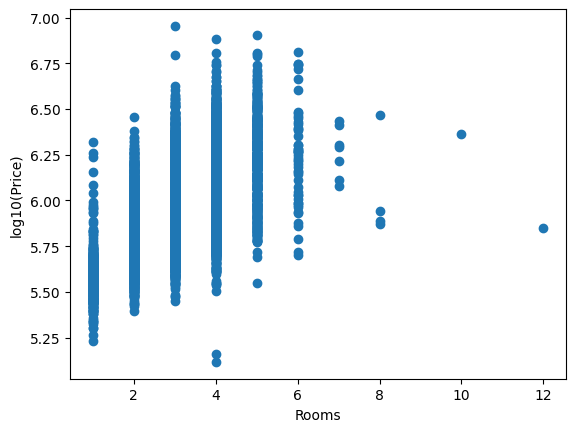

In [73]:
plt.scatter(nonansprice['Rooms'], np.log10(nonansprice['Price']), )
plt.xlabel('Rooms')
plt.ylabel('log10(Price)')

OK, so what I would like to do next: 

1. take a look at the df with landsize and buildingarea > 0: 
    1. How do they relate? 
    2. how do they relate with prize? Any linearlike relations to be seen? 

2. other than that: get a linear regression model to work..?

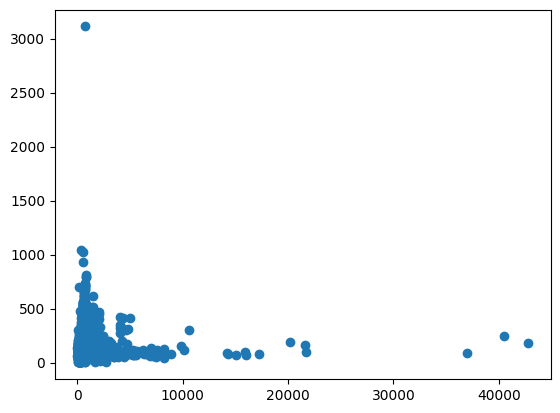

In [80]:
plt.scatter(buildingnotzero['Landsize'], buildingnotzero['BuildingArea'])


## 4. Model Building

## 5. Iterating